## GPU

In [94]:
!nvidia-smi

Sun Nov 30 02:04:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P0             27W /   70W |     376MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Library Imports

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import joblib
from sklearn.inspection import PartialDependenceDisplay
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

## 2. Data Loading

In [36]:
df = pd.read_csv('/content/Superstore.csv')

## 3. Initial Data Overview

In [37]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [39]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [40]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


## 4. Data Visualization and Exploration

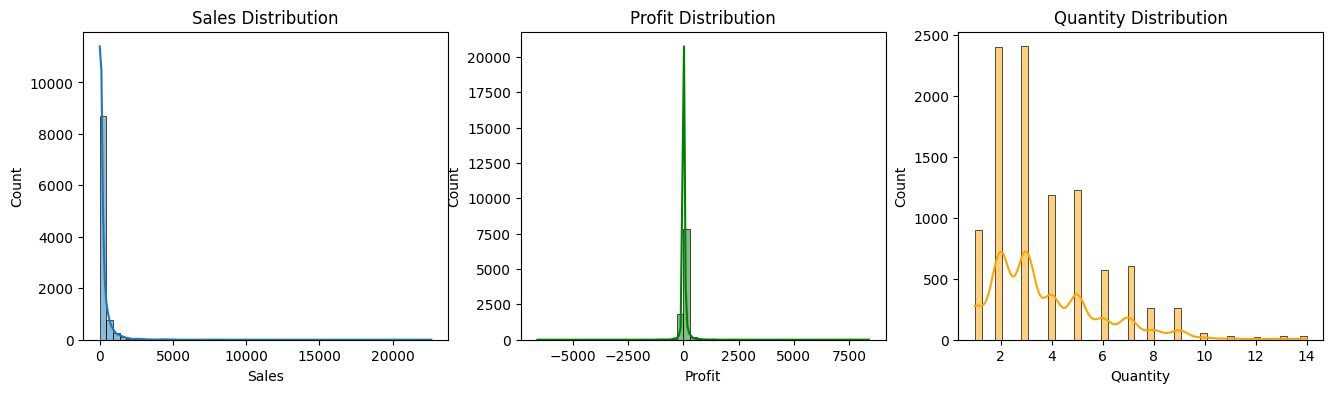

In [41]:
# Sales, Profit, Quantity distribution
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")

plt.subplot(1,3,2)
sns.histplot(df['Profit'], bins=50, kde=True, color='green')
plt.title("Profit Distribution")

plt.subplot(1,3,3)
sns.histplot(df['Quantity'], bins=50, kde=True, color='orange')
plt.title("Quantity Distribution")
plt.show()

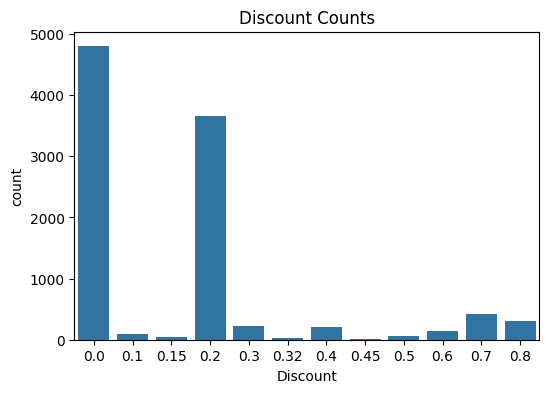

In [42]:
# Discount distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Discount', data=df)
plt.title("Discount Counts")
plt.show()

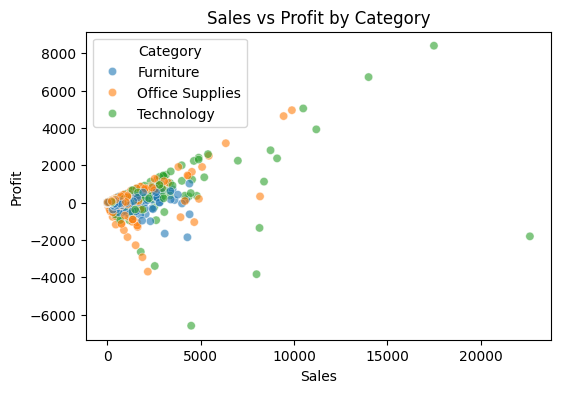

In [43]:
#  Sales vs Profit scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df, alpha=0.6)
plt.title("Sales vs Profit by Category")
plt.show()

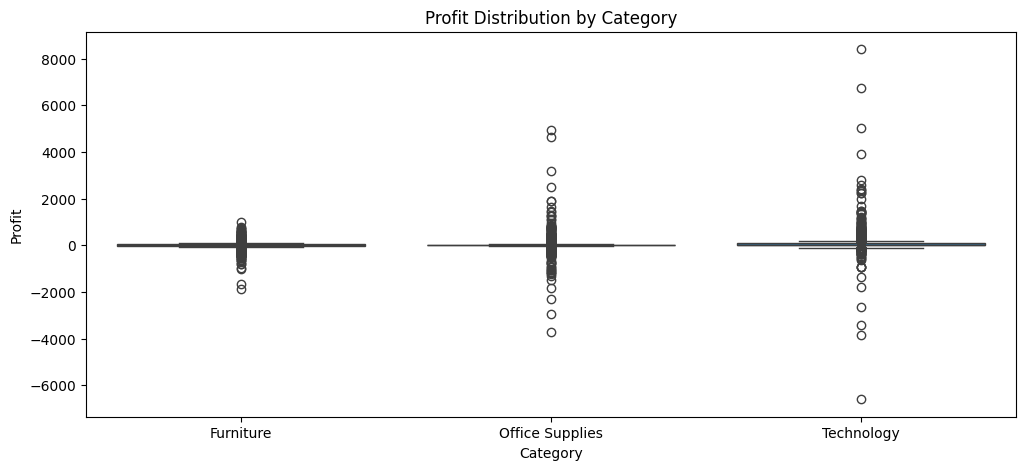

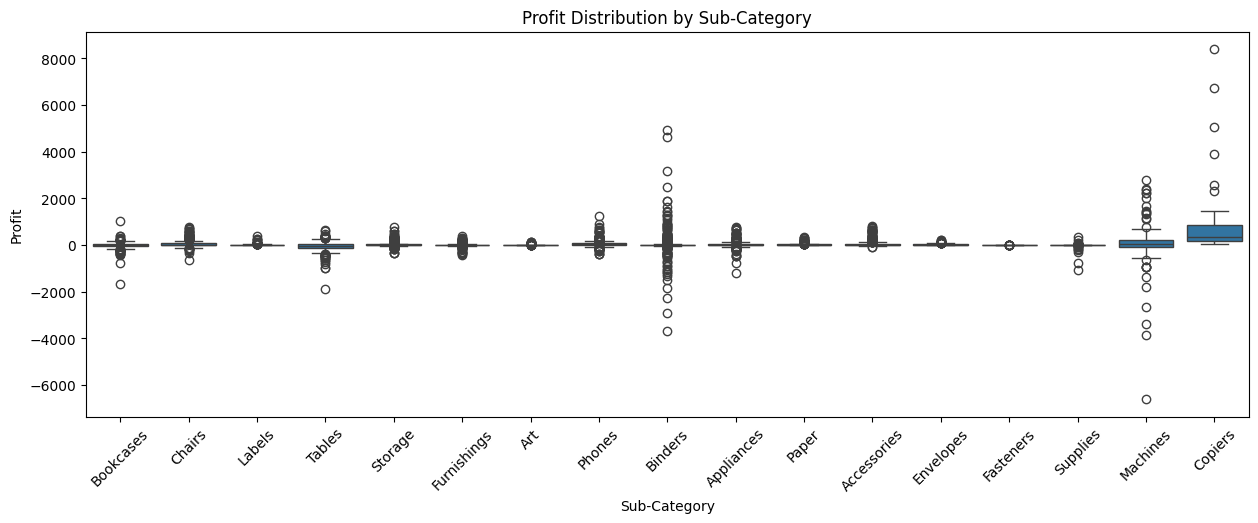

In [44]:
# Profit by Category and Sub-Category
plt.figure(figsize=(12,5))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit Distribution by Category")
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Sub-Category', y='Profit', data=df)
plt.xticks(rotation=45)
plt.title("Profit Distribution by Sub-Category")
plt.show()

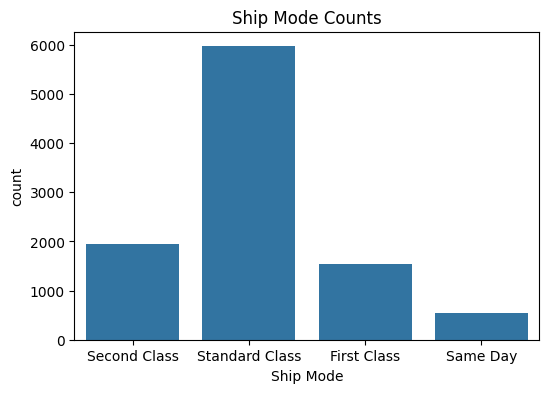

In [45]:
#  Ship Mode counts
plt.figure(figsize=(6,4))
sns.countplot(x='Ship Mode', data=df)
plt.title("Ship Mode Counts")
plt.show()

## 5. Feature Engineering and Preprocessing

In [46]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [47]:
df['OrderYear'] = df['Order Date'].dt.year.astype(int)
df['OrderMonth'] = df['Order Date'].dt.month.astype(int)

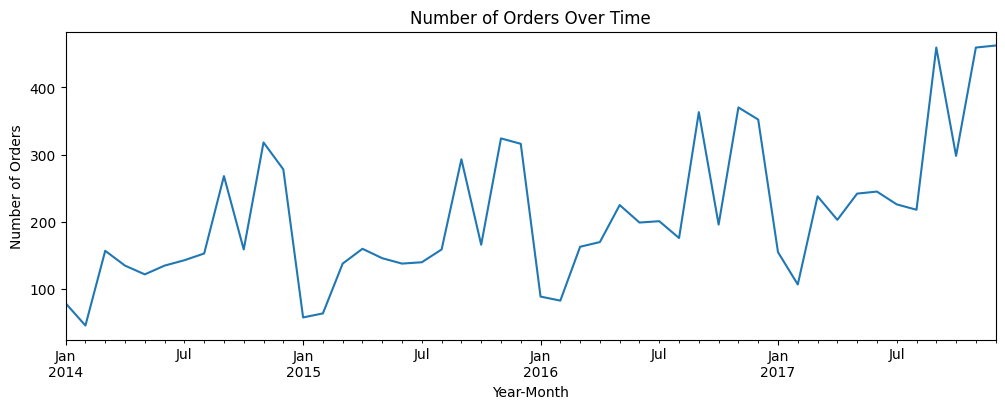

In [48]:
# Orders over Time
df['OrderYearMonth'] = df['Order Date'].dt.to_period('M')
orders_per_month = df.groupby('OrderYearMonth').size()

plt.figure(figsize=(12,4))
orders_per_month.plot()
plt.title("Number of Orders Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Orders")
plt.show()

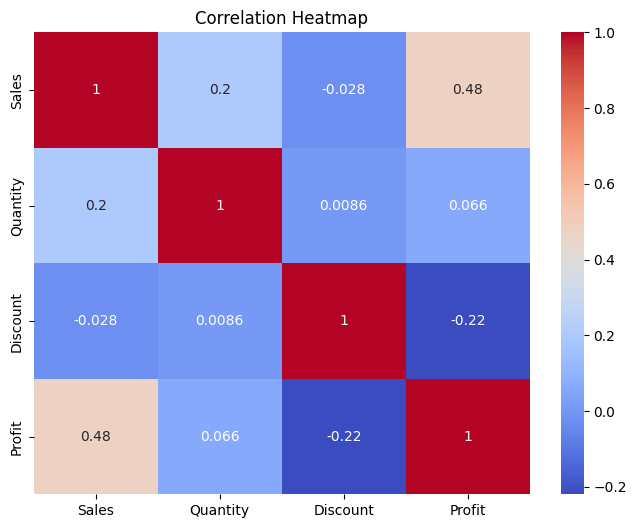

In [49]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales','Quantity','Discount','Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [50]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'OrderYear',
       'OrderMonth', 'OrderYearMonth'],
      dtype='object')

In [51]:
df.shape

(9994, 24)

In [52]:
print(df.City.nunique())
df.City.value_counts()

531


,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
...,...
Abilene,1
Montebello,1
Kissimmee,1


In [53]:
print(df.Country.nunique())
df.Country.value_counts()

1


,count
Country,
United States,9994


In [54]:
print(df.State.nunique())
df.State.value_counts()

49


,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


### 5.1. Dropping Unnecessary Columns

In [55]:
# Drop UnNeeded Coulmns
cols_to_drop = [
    'Row ID', 'Order ID', 'Customer ID', 'Customer Name','Product ID', 'Country'
]
df = df.drop(columns=cols_to_drop)

In [56]:
df.OrderYearMonth[0]

Period('2016-11', 'M')

### 5.2. Date Feature Extraction and Dropping Date Columns

In [57]:
# Exreact New Features From Dates
df['OrderYear'] = df['Order Date'].dt.year
df['OrderMonth'] = df['Order Date'].dt.month
df['ShippingDelay'] = (df['Ship Date'] - df['Order Date']).dt.days

df = df.drop(columns=['Order Date', 'Ship Date','OrderYearMonth'])

### 5.3. Categorical Feature Encoding

In [58]:
# Lable Encoding
cat_cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category','Product Name', "City", "State"]
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

### 5.4. Outlier Handling (Clipping)

In [59]:
# Handling Outliers
lower = df['Profit'].quantile(0.01)
upper = df['Profit'].quantile(0.99)
df['Profit_clipped'] = df['Profit'].clip(lower, upper)

# Sales
lower_sales = df['Sales'].quantile(0.01)
upper_sales = df['Sales'].quantile(0.99)
df['Sales_clipped'] = df['Sales'].clip(lower_sales, upper_sales)

# Quantity
lower_qty = df['Quantity'].quantile(0.01)
upper_qty = df['Quantity'].quantile(0.99)
df['Quantity_clipped'] = df['Quantity'].clip(lower_qty, upper_qty)

## 6. Data Splitting and Scaling

In [60]:
# Split Data
y = df['Sales_clipped']
X = df.drop(columns=['Sales', 'Sales_clipped','Profit'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [61]:
# Save the Feature Order
joblib.dump(X.columns.tolist(), "feature_order.joblib")

['feature_order.joblib']

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. ML Model Training and Evaluation

### 7.1. Support Vector Regressor (SVR)

In [63]:
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Evalluate Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_svr)
mse_dt = mean_squared_error(y_test, y_pred_svr)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_svr)

In [64]:
print("SVR Evaluation:")
print("------------------------------------")
print("MAE :", mae_dt)
print("MSE :", mse_dt)
print("RMSE:", rmse_dt)
print("R²  :", r2_dt)

SVR Evaluation:
------------------------------------
MAE : 96.98692412337483
MSE : 62853.12599573185
RMSE: 250.7052572159823
R²  : 0.6508089961379162


### 7.2. Decision Tree Regressor

In [65]:
# Train Decision Tree
dt = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=5,
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [66]:
# Evalluate Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Evaluation:")
print("------------------------------------")
print("MAE :", mae_dt)
print("MSE :", mse_dt)
print("RMSE:", rmse_dt)
print("R²  :", r2_dt)

Decision Tree Evaluation:
------------------------------------
MAE : 72.54262425810613
MSE : 38164.71877835814
RMSE: 195.3579247902632
R²  : 0.7879695520118764


### 7.3. Random Forest Regressor

In [67]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=500, max_depth=15, min_samples_leaf=5,
                           random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [68]:
# Evaluate Random Forest Model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Evaluation:")
print("------------------------------------------------")
print("MAE :", mae_rf)
print("MSE :", mse_rf)
print("RMSE:", rmse_rf)
print("R²  :", r2_rf)

Random Forest Evaluation:
------------------------------------------------
MAE : 64.06244436073729
MSE : 31078.00637819716
RMSE: 176.289552663217
R²  : 0.8273409623894944


## 8. Model Persistence (Saving Models)

In [69]:
# Save SVR model
joblib.dump(svr, 'SVR_model.joblib')
print("SVR model saved as SVR_model.joblib")

# Save Decision Tree model
joblib.dump(dt, 'DecisionTree_model.joblib')
print("Decision Tree model saved as DecisionTree_model.joblib")

# Save Random Forest model
joblib.dump(rf, 'RandomForest_model.joblib')
print("Random Forest model saved as RandomForest_model.joblib")

SVR model saved as SVR_model.joblib
Decision Tree model saved as DecisionTree_model.joblib
Random Forest model saved as RandomForest_model.joblib


In [70]:
# Save LabelEncoder
joblib.dump(encoders, "label_encoders.joblib")
print("LabelEncoder saved as label_encoder.joblib")

# Save the StandardScaler used for scikit-learn models
joblib.dump(scaler, 'standard_scaler_sklearn.joblib')
print("StandardScaler (for scikit-learn models) saved as standard_scaler_sklearn.joblib")

LabelEncoder saved as label_encoder.joblib
StandardScaler (for scikit-learn models) saved as standard_scaler_sklearn.joblib


## 9. Random Forest Model Analysis

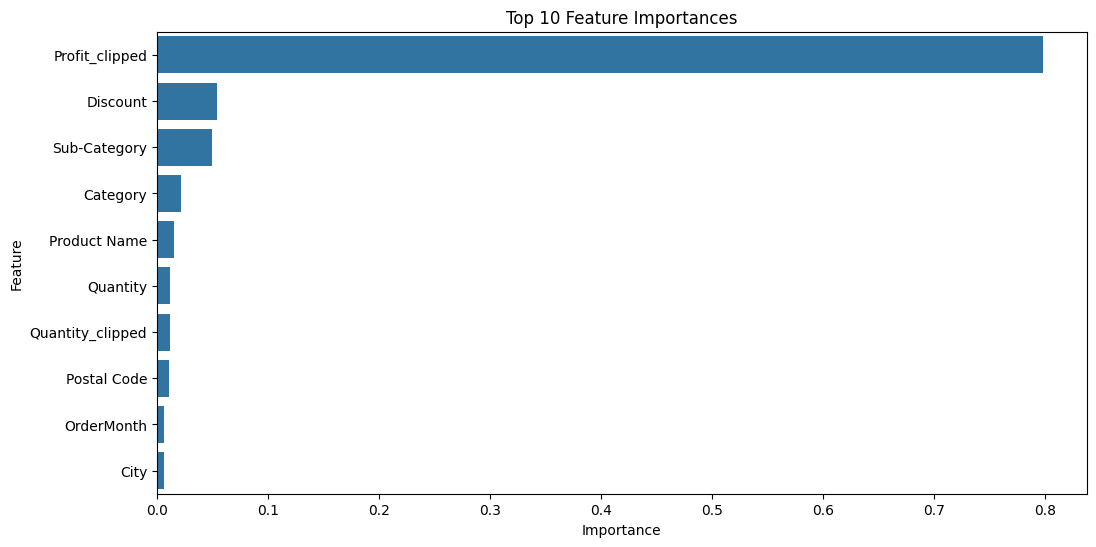

In [71]:
#  Feature Importance
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### 9.1. Partial Dependence Plots

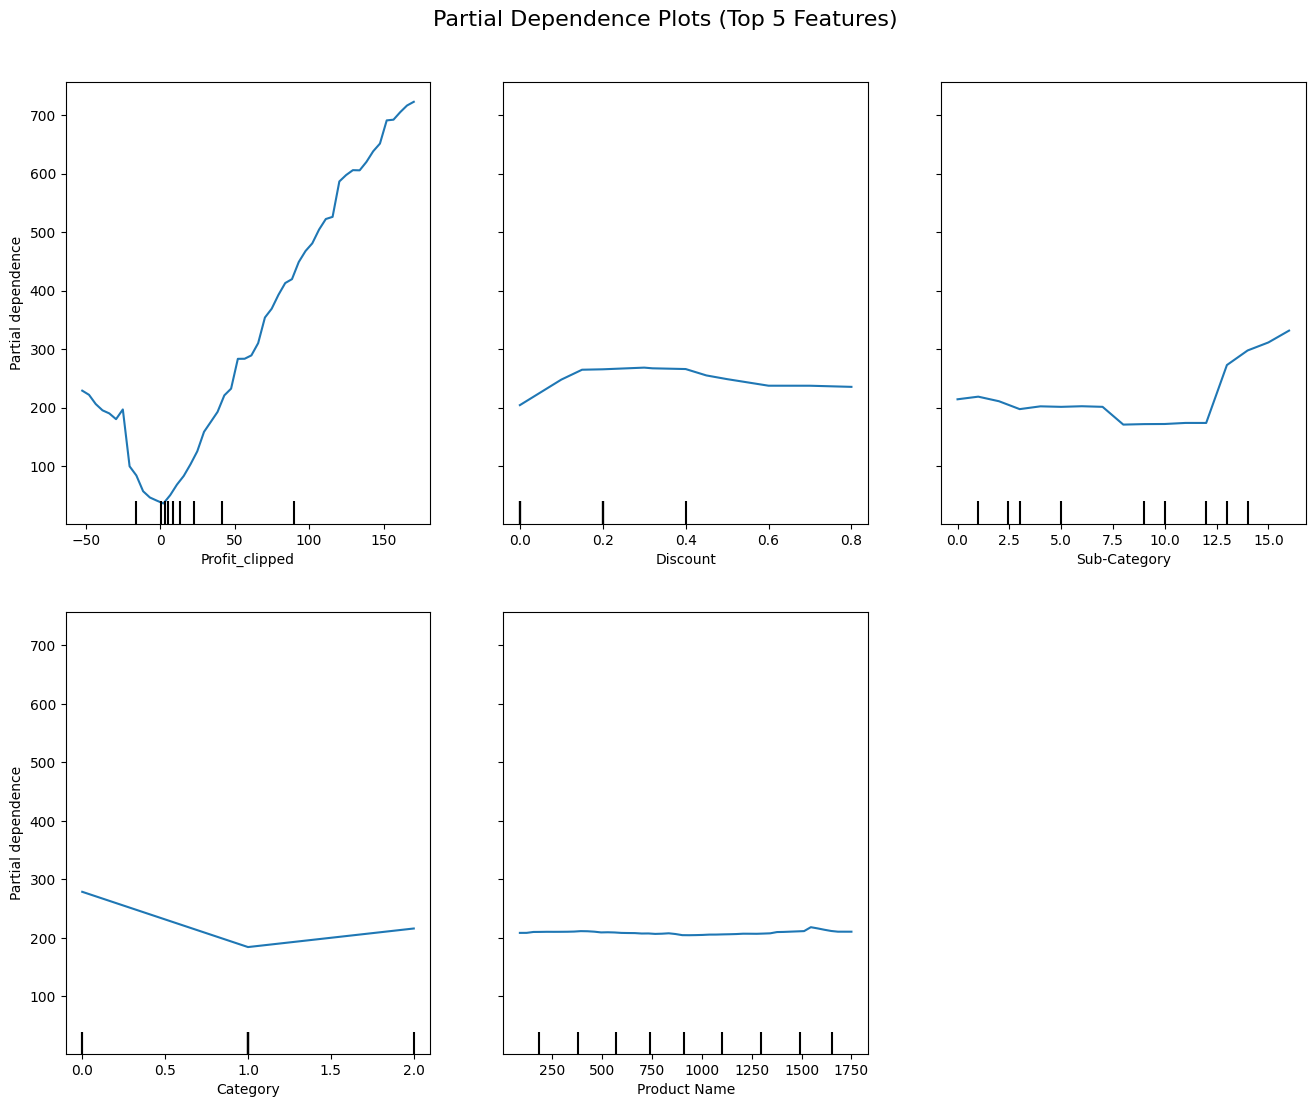

In [72]:
# Top 5 Features
top_features = feat_imp.index[:5]

# Plot Partial Dependence
fig, ax = plt.subplots(figsize=(16,12))
display = PartialDependenceDisplay.from_estimator(
    rf,
    X_train,
    features=top_features,
    kind="average",
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Partial Dependence Plots (Top 5 Features)", fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


### 9.2. Random Forest Residual Analysis

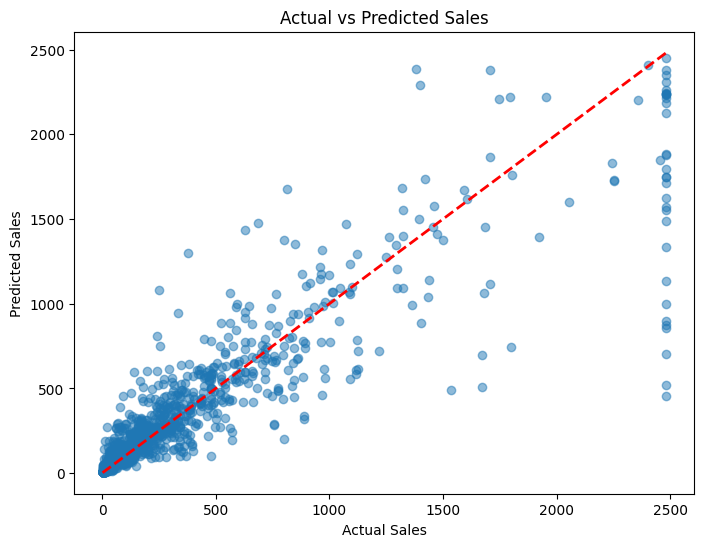

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

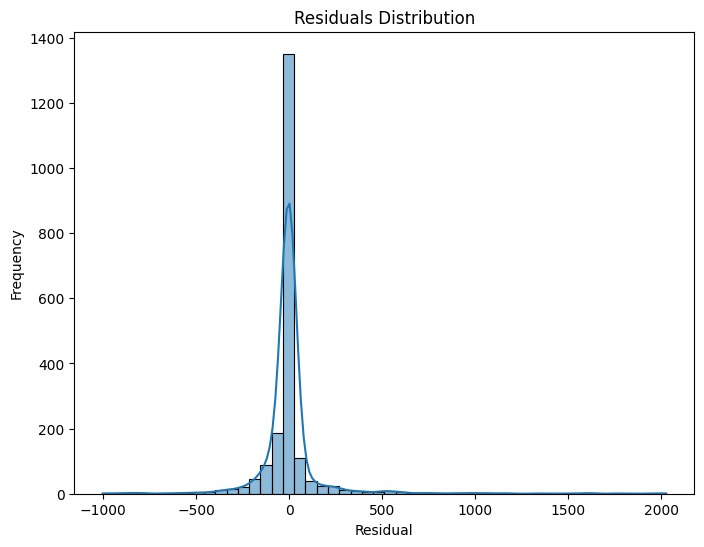

In [74]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

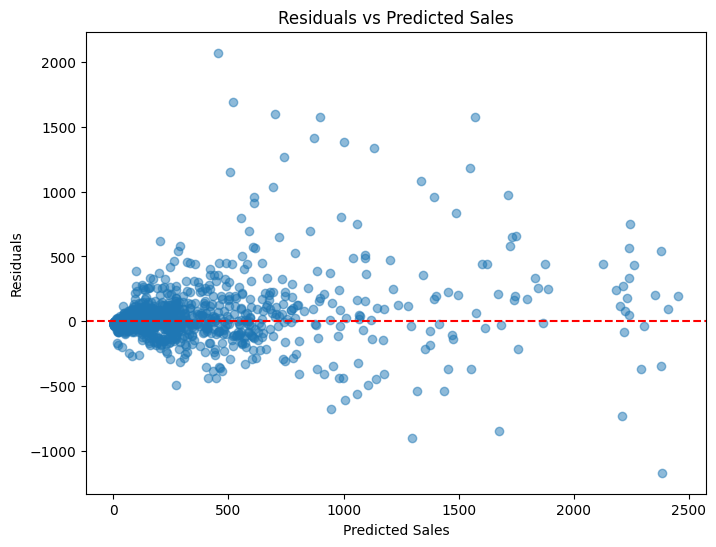

In [105]:
plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales")
plt.show()

## 10. Neural Network Model (Keras)

In [76]:
kerasmodel = keras.models.Sequential([
    keras.layers.Input(shape=(16,)),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

In [77]:
MyOptimizer = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="AdamW"
)

In [78]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

In [79]:
kerasmodel.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae', 'mse']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True
)


history = kerasmodel.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=100,
    batch_size=64,
    verbose=1
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.6402 - mae: 0.4910 - mse: 0.6402 - val_loss: 0.4136 - val_mae: 0.3323 - val_mse: 0.4136
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3432 - mae: 0.3454 - mse: 0.3432 - val_loss: 0.3253 - val_mae: 0.2755 - val_mse: 0.3253
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2867 - mae: 0.2975 - mse: 0.2867 - val_loss: 0.2963 - val_mae: 0.2603 - val_mse: 0.2963
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2459 - mae: 0.2770 - mse: 0.2459 - val_loss: 0.3114 - val_mae: 0.2615 - val_mse: 0.3114
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2344 - mae: 0.2644 - mse: 0.2344 - val_loss: 0.2639 - val_mae: 0.2360 - val_mse: 0.2639
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2174 - mae: 0.2574 - mse: 0.2174 - val_loss: 0.2678 - val_mae: 0.2331 - val_mse: 0.2678
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2187 - mae: 0.2494 - mse: 0.21

In [80]:
print(kerasmodel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,333 (231.77 KB)

 Trainable params: 19,777 (77.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,556 (154.52 KB)

None


In [81]:
kerasmodel.save("KerasModel.keras")

# Save the StandardScaler for X (Keras model)
joblib.dump(scaler_x, 'standard_scaler_X_keras.joblib')
print("StandardScaler (for Keras X) saved as standard_scaler_X_keras.joblib")

# Save the StandardScaler for y (Keras model)
joblib.dump(scaler_y, 'standard_scaler_y_keras.joblib')
print("StandardScaler (for Keras y) saved as standard_scaler_y_keras.joblib")

StandardScaler (for Keras X) saved as standard_scaler_X_keras.joblib
StandardScaler (for Keras y) saved as standard_scaler_y_keras.joblib


In [82]:
y_pred_scaled = kerasmodel.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [83]:
NewKerasModel = keras.models.load_model('KerasModel.keras')

In [84]:
y_pred_scaled = NewKerasModel.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [85]:
print('Prediction Shape is {}'.format(y_pred_scaled.shape))

Prediction Shape is (1999, 1)


In [86]:
print('Prediction items are {}'.format(y_pred[:5]))

Prediction items are [[ 98.35385 ]
 [ 25.387032]
 [ 26.733635]
 [470.91507 ]
 [296.91318 ]]


In [87]:
ModelLoss = NewKerasModel.evaluate(X_test_scaled, y_test_scaled)
print('Model Loss is {}'.format(ModelLoss))

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2384 - mae: 0.2072 - mse: 0.2384
Model Loss is [0.2179267257452011, 0.19773264229297638, 0.2179267257452011]


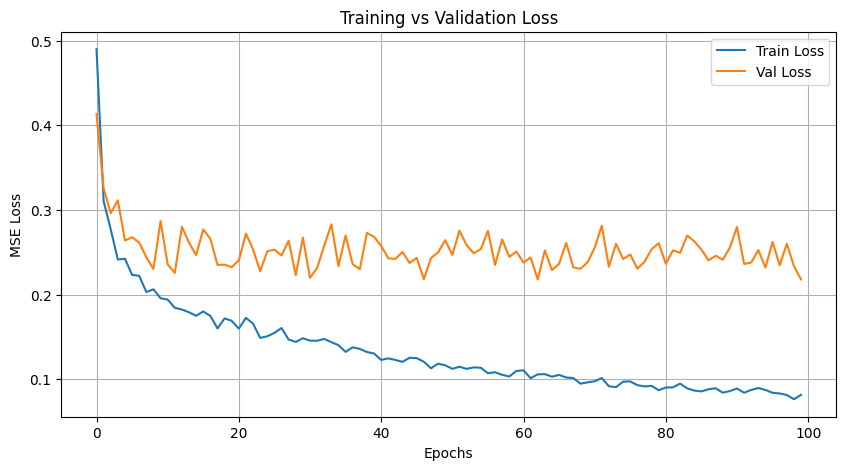

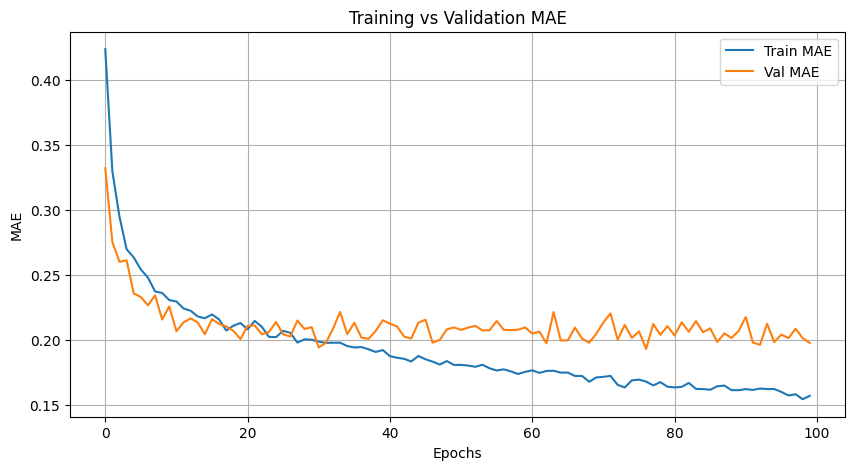

In [88]:
# --- Plot Training vs Validation Loss ---
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# --- Plot Training vs Validation MAE ---
plt.figure(figsize=(10,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Training vs Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


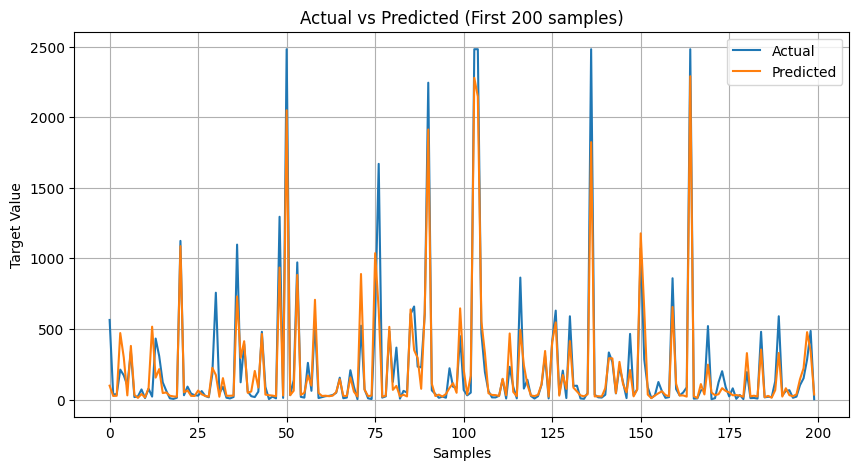

In [89]:
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

plt.figure(figsize=(10,5))
plt.plot(y_test_original[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.title("Actual vs Predicted (First 200 samples)")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

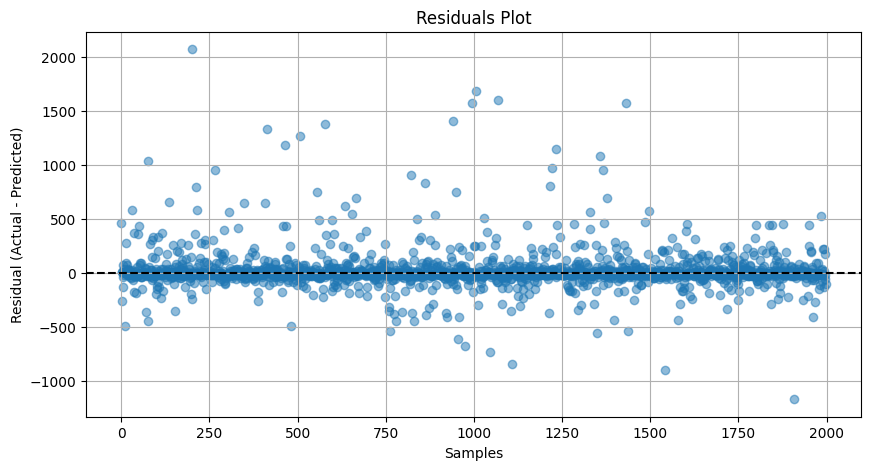

In [90]:
residuals = y_test_original - y_pred

plt.figure(figsize=(10,5))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Samples")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.show()

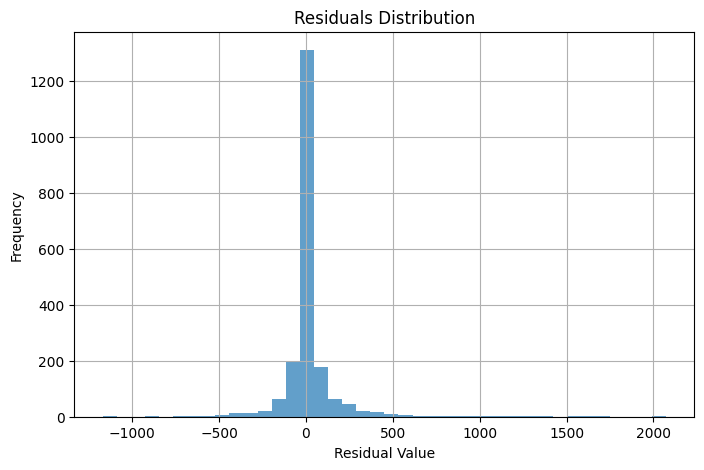

In [91]:
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=40, alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [92]:
y_pred_scaled = kerasmodel.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [93]:
mae_nn = mean_absolute_error(y_test_original, y_pred)
mse_nn = mean_squared_error(y_test_original, y_pred)
rmse_nn = mse_rf ** 0.5
r2_nn = r2_score(y_test_original, y_pred)

print("Neural Network Evaluation:")
print("------------------------------------------------")
print("MAE :", mae_nn)
print("MSE :", mse_nn)
print("RMSE:", rmse_nn)
print("R²  :", r2_nn)

Neural Network Evaluation:
------------------------------------------------
MAE : 76.53025399058163
MSE : 32645.24775081094
RMSE: 176.289552663217
R²  : 0.8186338920643946


# Hyperparameter Tuning:

## Experiment with Learning Rate and Batch Size



In [95]:
def create_and_compile_model(learning_rate):
    model = keras.models.Sequential([
        keras.layers.Input(shape=(16,)),
        keras.layers.Dense(64, activation='tanh'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

print("Defined create_and_compile_model function.")

Defined create_and_compile_model function.


In [101]:
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [32, 64, 128]
epochs = 50

results = []

for lr in learning_rates:
    for bs in batch_sizes:
        print(f"\nTraining with Learning Rate: {lr}, Batch Size: {bs}")
        model = create_and_compile_model(learning_rate=lr)

        history = model.fit(
            X_train_scaled, y_train_scaled,
            validation_data=(X_test_scaled, y_test_scaled),
            epochs=epochs,
            batch_size=bs,
            verbose=0
        )

        # Evaluate the model
        y_pred_scaled_exp = model.predict(X_test_scaled)
        y_pred_exp = scaler_y.inverse_transform(y_pred_scaled_exp)
        y_test_original_exp = scaler_y.inverse_transform(y_test_scaled)

        mae_exp = mean_absolute_error(y_test_original_exp, y_pred_exp)
        mse_exp = mean_squared_error(y_test_original_exp, y_pred_exp)
        rmse_exp = mse_exp ** 0.5
        r2_exp = r2_score(y_test_original_exp, y_pred_exp)

        results.append({
            'optimizer': 'Adam',
            'learning_rate': lr,
            'batch_size': bs,
            'mae': mae_exp,
            'mse': mse_exp,
            'rmse': rmse_exp,
            'r2': r2_exp,
            'history': history.history
        })

        print(f"  MAE: {mae_exp:.4f}, MSE: {mse_exp:.4f}, R2: {r2_exp:.4f}")

print("\nExperimentation complete. Results stored.")


Training with Learning Rate: 0.01, Batch Size: 32
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
  MAE: 135.9199, MSE: 57128.4323, R2: 0.6826

Training with Learning Rate: 0.01, Batch Size: 64
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  MAE: 111.3315, MSE: 51123.6975, R2: 0.7160

Training with Learning Rate: 0.01, Batch Size: 128
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  MAE: 88.1997, MSE: 42750.5519, R2: 0.7625

Training with Learning Rate: 0.001, Batch Size: 32
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
  MAE: 84.9429, MSE: 36150.7856, R2: 0.7992

Training with Learning Rate: 0.001, Batch Size: 64
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  MAE: 75.0818, MSE: 33309.9928, R2: 0.8149

Training with Learning Rate: 0.001, Batch Size: 128
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  MAE: 72.9170, MSE: 32925.7470, R2: 0.8171

Training with Learning Rate: 0.0001, Batch Size: 32
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  MAE: 85.3650, MSE: 36826.2580, R2: 0.7954

Training with Learning Rate: 0.0001, Batch Size: 64


In [97]:
print("\n--- Experiment Results ---")
for res in results:
    print(f"Learning Rate: {res['learning_rate']}, Batch Size: {res['batch_size']}")
    print(f"  MAE: {res['mae']:.4f}")
    print(f"  MSE: {res['mse']:.4f}")
    print(f"  RMSE: {res['rmse']:.4f}")
    print(f"  R2: {res['r2']:.4f}")
    print("-------------------------------------")


--- Experiment Results ---
Learning Rate: 0.01, Batch Size: 32
  MAE: 102.6197
  MSE: 48909.6911
  RMSE: 221.1554
  R2: 0.7283
-------------------------------------
Learning Rate: 0.01, Batch Size: 64
  MAE: 89.3748
  MSE: 39402.5446
  RMSE: 198.5007
  R2: 0.7811
-------------------------------------
Learning Rate: 0.01, Batch Size: 128
  MAE: 100.0023
  MSE: 44490.8832
  RMSE: 210.9286
  R2: 0.7528
-------------------------------------
Learning Rate: 0.001, Batch Size: 32
  MAE: 76.9474
  MSE: 34480.3880
  RMSE: 185.6890
  R2: 0.8084
-------------------------------------
Learning Rate: 0.001, Batch Size: 64
  MAE: 79.7325
  MSE: 38531.9798
  RMSE: 196.2956
  R2: 0.7859
-------------------------------------
Learning Rate: 0.001, Batch Size: 128
  MAE: 75.6608
  MSE: 32865.7719
  RMSE: 181.2892
  R2: 0.8174
-------------------------------------
Learning Rate: 0.0001, Batch Size: 32
  MAE: 80.1344
  MSE: 35087.2408
  RMSE: 187.3159
  R2: 0.8051
-------------------------------------
Lear

## Experiment with Different Optimizers



In [98]:
def create_and_compile_model_with_optimizer(optimizer_instance):
    model = keras.models.Sequential([
        keras.layers.Input(shape=(16,)),
        keras.layers.Dense(64, activation='tanh'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=optimizer_instance,
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

print("Defined create_and_compile_model_with_optimizer function.")

Defined create_and_compile_model_with_optimizer function.


In [99]:
optimizers_to_test = {
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001),
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.001),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.001)
}

batch_size_opt = 64
epochs_opt = 50

for opt_name, optimizer_instance in optimizers_to_test.items():
    print(f"\nTraining with Optimizer: {opt_name}, Learning Rate: {optimizer_instance.learning_rate.numpy()}, Batch Size: {batch_size_opt}")
    model_opt = create_and_compile_model_with_optimizer(optimizer_instance)

    history_opt = model_opt.fit(
        X_train_scaled, y_train_scaled,
        validation_data=(X_test_scaled, y_test_scaled),
        epochs=epochs_opt,
        batch_size=batch_size_opt,
        verbose=0
    )

    # Evaluate the model
    y_pred_scaled_opt = model_opt.predict(X_test_scaled)
    y_pred_opt = scaler_y.inverse_transform(y_pred_scaled_opt)
    y_test_original_opt = scaler_y.inverse_transform(y_test_scaled)

    mae_opt = mean_absolute_error(y_test_original_opt, y_pred_opt)
    mse_opt = mean_squared_error(y_test_original_opt, y_pred_opt)
    rmse_opt = mse_opt ** 0.5
    r2_opt = r2_score(y_test_original_opt, y_pred_opt)

    results.append({
        'optimizer': opt_name,
        'learning_rate': optimizer_instance.learning_rate.numpy(),
        'batch_size': batch_size_opt,
        'mae': mae_opt,
        'mse': mse_opt,
        'rmse': rmse_opt,
        'r2': r2_opt,
        'history': history_opt.history
    })

    print(f"  MAE: {mae_opt:.4f}, MSE: {mse_opt:.4f}, R2: {r2_opt:.4f}")

print("\nOptimizer experimentation complete. Results updated.")


Training with Optimizer: Adam, Learning Rate: 0.0010000000474974513, Batch Size: 64
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
  MAE: 79.0478, MSE: 36225.8892, R2: 0.7987

Training with Optimizer: SGD, Learning Rate: 0.0010000000474974513, Batch Size: 64
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
  MAE: 123.9154, MSE: 61365.6883, R2: 0.6591

Training with Optimizer: RMSprop, Learning Rate: 0.0010000000474974513, Batch Size: 64
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
  MAE: 80.2903, MSE: 35181.3749, R2: 0.8045

Optimizer experimentation complete. Results updated.


In [102]:
print("\n--- All Experiment Results ---")

results_df = pd.DataFrame(results)


print(results_df.sort_values(by='r2', ascending=False).to_string())


best_result = results_df.loc[results_df['r2'].idxmax()]

print("\n--- Best Performing Model Configuration ---")
print(f"Optimizer: {best_result.get('optimizer', 'Adam')}")
print(f"Learning Rate: {best_result['learning_rate']:.5f}")
print(f"Batch Size: {best_result['batch_size']}")
print(f"MAE: {best_result['mae']:.4f}")
print(f"MSE: {best_result['mse']:.4f}")
print(f"RMSE: {best_result['rmse']:.4f}")
print(f"R2: {best_result['r2']:.4f}")


--- All Experiment Results ---
  optimizer  learning_rate  batch_size         mae           mse        rmse        r2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  